<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas para trabajar con Algebra Lineal

In [340]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime as dt
import time
%matplotlib inline

# Ejercicio 1. Defina las siguientes matrices.

Definir las matrices:

$
A=
\begin{bmatrix}
1 & 3 \\
-1 & 7 
\end{bmatrix}
$

$
B=
\begin{bmatrix}
5 & 2 \\
1 & 2 
\end{bmatrix}
$

$
I=
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
$

Calcule el resultado de $2*I+3*A+A@B$

In [ ]:
A=np.array([[1,3],[-1,7]])
B=np.array([[5,2],[1,2]])
I=np.array([[1,0],[0,1]])
print('A=\n',A,'\n')
print('B=\n',B,'\n')
print('I=\n',I,'\n')
P1=2*I+3*A+A@B
print('2*I+3*A+A@B=\n',P1,'\n')

A=
 [[ 1  3]
 [-1  7]] 

B=
 [[5 2]
 [1 2]] 

I=
 [[1 0]
 [0 1]] 

2*I+3*A+A@B=
 [[13 17]
 [-1 35]] 



# Ejercicio 2. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [360]:
Dem=np.array([[8,1],[1,4]])
print('La matriz A:\n',Dem,'\n')
#Pol2=la.det(Dem)-(np.trace(Dem))*Dem+Dem*Dem
#print('Al ser distinto de 0, podemos decir que su polinomio caracteristico es=\n',Pol2,'\n')
print('tiene un determinante=',la.det(Dem))
print('Trazo:',np.trace(Dem))

La matriz A:
 [[8 1]
 [1 4]] 

tiene un determinante= 31.0
Trazo: 12


$$P_2(A)=(s-8)(s-4)-31$$
$$A^2-12A+I=0$$

Coincidiendo con que satisface el Teorema de Cayley-Hamilton que nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
$$P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2$$

# Ejercicio 3: Resuelva el sistema de ecuaciones.
$$\begin{eqnarray*}
x - 3 y + z  =  1 \\ \nonumber
3 x - 4y + z  = 5 \\ \nonumber
2 y - z  = 0 \\ \nonumber
\end{eqnarray*}$$

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

## Primero definimos las funciones necesarias para hacer operaciones para la eliminacion gausianna

In [ ]:
# Intercambio de posición de renglones.
def cambia_r(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def mult_r(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def suma_r(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

## Luego resolvemos el sistema de ecuaciones
$$\begin{eqnarray*}
x - 3 y + z  =  1 \\ \nonumber
3 x - 4y + z  = 5 \\ \nonumber
2 y - z  = 0 \\ \nonumber
\end{eqnarray*}$$

In [ ]:
Ec1=np.array([[1,-3,1,1],[3,-4,1,5],[0,-2,-1,0]])
print('Tenemos el sistema de ecuaciones=\n',Ec1,'\n')
Ec2=suma_r(A,-3,1,0)
print('Sumamos -3 veces el renglon 1 al renglon 2=\n',Ec2,'\n')
Ec3=mult_r(Ec2,1/5,1)
print('Dividimos entre 5 el segundo renglon para usarlo como pivote=\n',Ec3,'\n')
Ec4=suma_r(Ec3,3,0,1)
Ec4=suma_r(Ec4,2,2,1)
print('Multiplicamos por 3 el segundo renglon, se lo sumamos al primero. Tambien multiplicamos el segundo renglon por 2 y lo sumamos al renglon 3=\n',Ec4,'\n')
Ec5=mult_r(Ec4,-1/1.8,2)
print('Dividimos entre 1.8 el tercer renglon para usarlo como pivote=\n',Ec5,'\n')
Ec6=suma_r(Ec5,0.4,1,2)
Ec6=suma_r(Ec6,0.2,0,2)

print('Multiplicamos por 0.2 el tercer renglon, se lo sumamos al primero. Tambien multiplicamos el tercer renglon por 0.4 y lo sumamos al renglon 3=\n',Ec6,'\n')
col=Ec6[0:,3]
print('Teniendo como resultado por eliminacion gaussiana\n',col,'\n')

M=np.array([[1,-3,1],[3,-4,1],[0,-2,-1]])
b=np.array([[1],[5],[0]])
x_sol = la.solve(M, b)
print('Teniendo como resultado por el comando la.solve\n',x_sol)

Tenemos el sistema de ecuaciones=
 [[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0 -2 -1  0]] 

Sumamos -3 veces el renglon 1 al renglon 2=
 [[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0. -2. -1.  0.]] 

Dividimos entre 5 el segundo renglon para usarlo como pivote=
 [[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.  -2.  -1.   0. ]] 

Multiplicamos por 3 el segundo renglon, se lo sumamos al primero. Tambien multiplicamos el segundo renglon por 2 y lo sumamos al renglon 3=
 [[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -1.8  0.8]] 

Dividimos entre 1.8 el tercer renglon para usarlo como pivote=
 [[ 1.          0.         -0.2         2.2       ]
 [ 0.          1.         -0.4         0.4       ]
 [ 0.          0.          1.         -0.44444444]] 

Multiplicamos por 0.2 el tercer renglon, se lo sumamos al primero. Tambien multiplicamos el tercer renglon por 0.4 y lo sumamos al renglon 3=
 [[ 1.00000000e+00  0.00000000e+00 -5.55111512e-17  2.11111111e+00]
 [ 0.00000000e+00  1.00000000e+00 

# Ejercicio 4:Dadas las siguientes matrices $B_1, B_2$ y $B_3$
(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.


In [3]:
B1=np.array([[2,0,0],[0,3,4],[0,4,9]])
B2=np.array([[0,1,0],[0,0,1],[1,0,0]])
B3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
eins=la.eig(B1)
zwei=la.eig(B2)
drei=la.eig(B3)
print('Calculando con la funcion la.eig(B1) es=\n',eins,'\n')
print('Calculando con la funcion la.eig(B2) es=\n',zwei,'\n')
print('Calculando con la funcion la.eig(B3) es=\n',drei,'\n')

Calculando con la funcion la.eig(B1) es=
 (array([11.+0.j,  1.+0.j,  2.+0.j]), array([[ 0.        ,  0.        ,  1.        ],
       [ 0.4472136 ,  0.89442719,  0.        ],
       [ 0.89442719, -0.4472136 ,  0.        ]])) 

Calculando con la funcion la.eig(B2) es=
 (array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ]), array([[ 0.57735027+0.j ,  0.57735027-0.j , -0.57735027+0.j ],
       [-0.28867513+0.5j, -0.28867513-0.5j, -0.57735027+0.j ],
       [-0.28867513-0.5j, -0.28867513+0.5j, -0.57735027+0.j ]])) 

Calculando con la funcion la.eig(B3) es=
 (array([3.+0.j, 3.+0.j, 2.+0.j, 2.+0.j]), array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.56395025e-16],
       [ 0.00000000e+00,  0.00000000e+00,  5.77350269e-01,
        -5.77350269e-01],
       [ 0.00000000e+00,  6.66133815e-16, -5.77350269e-01,
         5.77350269e-01],
       [ 1.00000000e+00, -1.00000000e+00,  5.77350269e-01,
        -5.77350269e-01]])) 



Resultados obtenidos con la funcion la.eig(B1):
$$\begin{equation*}
eigenvector_{B1}= \begin{bmatrix}
0 & 0 & 1\\
0.4472 & 0.8944 & 0\\
0.8944 & -0.4472 & 0\\
\end{bmatrix}\\
eigenvalores_{B1}=[11,\,\,1,\,\,2]
\\
\end{equation*}$$

Resultados obtenidos con la funcion la.eig(B2):
$$\begin{equation*}
eigenvector_{B2}= \begin{bmatrix}
0.5773 & 0.5773 & -0.5773 \\
-0.2887+0.5j & -0.2887-0.5j & -0.5773 \\
-0.2887-0.5j & -0.2887+0.5j & -0.5773 \\
\end{bmatrix}\\
eigenvalores_{B2}=[-0.5+0.8660j,\,\,-0.5-0.8660j,\,\,1]\\
\\
\end{equation*}$$

Resultados obtenidos con la funcion la.eig(B3):
$$\begin{equation*}
eigenvector_{B3}= \begin{bmatrix}
0 & 0 & 0 & 2.56 x10^{-16} \\
0 & 0 & 5.7735 x10^{-1} & -5.7735 x10^{-1} \\
0 & 6.6613 x10^{-16} & -5.7735 x10^{-1} & 5.7735 x10^{-1} \\
1 & -1 & 5.7735 x10^{-1} & -5.7735 x10^{-1} \\
\end{bmatrix}\\
eigenvalores_{B3}=[3,\,\,3,\,\,2,\,\,2]\\
\\
\end{equation*}$$

Al compararlos con los resultados de wikipedia nos damos cuenta que son aproximadamente iguales, ya que son multiplos de estos si no que en unos casos iguales.

# Ejercicio 5. Se tienen los siguientes 8 puntos:
$$\begin{eqnarray*} 
x,y\\
(0.0,0.0)\\ 
(0.5,0.47942)\\ 
(1.0,0.84147)\\
(1.5,0.99749)\\
(2.0,0.90930)\\
(2.5,0.59847)\\
(3.0,0.14112)\\
(3.5,-0.35078)\\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

In [ ]:
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
X = np.column_stack([x**k for k in range(0,8)])# Aunque X=np.vander(x,increasing=True) tambien sirve
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218750e+02 1.83826562e+03 6.43392969e+03]]

In [220]:
y=np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)
print(y)

[[ 0.     ]
 [ 0.47942]
 [ 0.84147]
 [ 0.99749]
 [ 0.9093 ]
 [ 0.59847]
 [ 0.14112]
 [-0.35078]]


In [ ]:
# Resolviendo asi la ecuacion
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


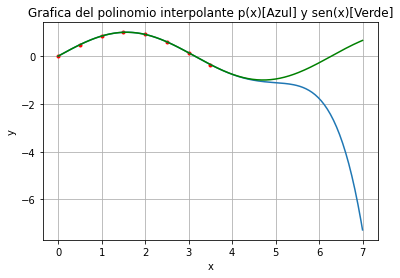

In [ ]:
# Graficamos el polinomio interpolante y los puntos interpolados
xs = np.linspace(0,8-1,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
seny = np.sin(xs)

plt.plot(x,y,'r.',xs,ys)
plt.plot(xs,seny, 'g')
plt.grid()
plt.title('Grafica del polinomio interpolante p(x)[Azul] y sen(x)[Verde]')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Ejercicio 6. Regrese a su modelo de análisis de series de tiempo.
Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

NOTA: Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.

## Se preparan los datos y la funcion

In [350]:
url = 'https://raw.githubusercontent.com/FelicianoRobles/FisicaComputacional1/master/Actividad3/3005.txt' # URL de inf raw
  
my_cols = ['Fecha', 'Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)'] # Nombre a columnas
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') # Leer

df_w1 = df_dist.copy() # Se hace una copia del dataframe

str_Nulo = 'Nulo'
df_w2 = df_w1.replace(to_replace=str_Nulo, value='', regex=True) # Reemplazar Nulo por un espacio en blanco

cols_list = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
for cols in cols_list:
  df_w2[cols] = pd.to_numeric(df_w2[cols], errors='coerce') # Se convierten a números flotantes 
#df_w2.info()

# De la instrucción anterior, vemos que hay valores faltantes. Sumamos los valores nulos. 
df_w2.isnull().sum()

# Un análisis estadístico breve de las variables numéricas redondeado a 2 cifras significativas
df_w2.describe().round(2)

df_w3 = df_w2.copy() # Se hace una copia del dataframe

df_w3['Fecha']=pd.to_datetime(df_w3['Fecha'], dayfirst=True).copy() # Primer dato que sea dia
#df_w3['year'] = df_w3['Fecha'].dt.year # Columna de año
#df_w3['month'] = df_w3['Fecha'].dt.month # Columna de mes
#df_w3['Precip(MM)']=df_w3.index
df_w3.dtypes # Verificar tipos
start, end = '2001-01', '2015-10'
df_meteo = df_w3.loc[start:end].copy()

#df_meteo = df_w3.copy() # Archico con que trabajar actividad 4
# df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())
#df_meteo['Tmax(°C)'].isnull().values.any()
#df_meteo['Tmin(°C)'].isnull().values.any()

           Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)
20010 2001-12-04         0.0       NaN      30.0      18.0
20011 2001-12-05         0.0       NaN      31.0      18.0
20012 2001-12-06         0.0       NaN      27.0      17.0
20013 2001-12-07         0.0       NaN      29.0      21.0
20014 2001-12-08         0.0       NaN      34.0      20.0
           Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)
20145 2002-04-18         0.0       6.5      29.0      18.0
20146 2002-04-19         0.0       6.6      30.0      19.0
20147 2002-04-20         0.0       7.5      31.0      19.0
20148 2002-04-21         0.0       5.3      30.0      17.0
20149 2002-04-22         0.0       7.8      31.0      18.0


Definir la funcion que convierte la fecha a decimal

In [351]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

## Convertimos la fecha a decimal en una nueva columna 'FechaDecimal'

In [352]:
df_act=df_meteo # Se trabajara con este dataframe
df_act['FechaDecimal']=df_meteo['Tmax(°C)'] # Se crea una columna copiando otra 
del(df_act['Precip(MM)']) # Se elimina
del(df_act['Evap(MM)']) # Se elimina

N=len(df_act) # Longitud del dataframe

for x in range(N): #Repetir por todo el rango del dataframe
  index=x
  df_act['FechaDecimal'].iloc[index]=toYearFraction(df_act['Fecha'].iloc[index]) # Hacer decimal la fecha

del(df_act['Fecha']) # Se elimina
df_act= df_act.astype(float) # Cambiar los tipos

print(df_act.head())
print(df_act.tail())
df_act.dtypes

       Tmax(°C)  Tmin(°C)  FechaDecimal
20010      30.0      18.0   2001.923288
20011      31.0      18.0   2001.926027
20012      27.0      17.0   2001.928767
20013      29.0      21.0   2001.931507
20014      34.0      20.0   2001.934247
       Tmax(°C)  Tmin(°C)  FechaDecimal
20145      29.0      18.0   2002.293151
20146      30.0      19.0   2002.295890
20147      31.0      19.0   2002.298630
20148      30.0      17.0   2002.301370
20149      31.0      18.0   2002.304110


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Tmax(°C)        float64
Tmin(°C)        float64
FechaDecimal    float64
dtype: object

Construimos la matriz de Vandermonde

In [353]:
x=df_act['FechaDecimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (140, 2)


Construimos las matrices "y"

In [354]:
ymax=np.array(df_act['Tmax(°C)'])
ymin=np.array(df_act['Tmin(°C)'])

Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'

In [355]:
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[-1.58082922e+04  7.90962969e+00]
Para Tmin
[-1.31255078e+04  6.56315691e+00]


Obteniendo de esa manera $a_0$ y $a_1$ de Tmax:
$$a_0\approx-1.58x10^{4}$$
$$a_1\approx7.90$$

Y tambien $a_0$ y $a_1$ de Tmin:
$$a_0\approx-1.31x10^{4}$$
$$a_1\approx6.56$$


Obteniendo las aproximaciones lineales \\
Para Tmax:$$Tmax=-1.58x10^{4}+7.90t$$
Para Tmin:$$Tmin=-1.31x10^{4}+6.56t$$

Asi que en base a esto podemos concluir que durante el periodo analizado, la temperatura aumento ya que la pendiente de la aproximacion lineal es positiva. 